In [1]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def plot_dynamics(x0, x1, parameters={}):
    fig = plt.figure(figsize=(18,7))
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1.plot(x0, 'r-', label=parameters.get('x0_label', 'x0'))
    ax1.plot(x1, 'b-', label=parameters.get('x1_label', 'x1'))
    ax1.set_title('Dynamics in time')
    ax1.set_xlabel('time')
    ax1.legend(loc='best')

    ax2.plot(x0, x1, color='blue')
    ax2.set_xlabel(parameters.get('x0_label', 'x0'))
    ax2.set_ylabel(parameters.get('x1_label', 'x1'))
    ax2.scatter([x0[0]], [x1[0]], marker='X', label='Start', c='r', linewidths=3)
    ax2.set_title('Trajectory')
    ax2.legend(loc='best')
    

def plot_phase_plane(f, lines=10, x0_bounds=(0, 2), x1_bounds=(0, 2), parameters={}):
    x = np.linspace(*x0_bounds, lines)
    y = np.linspace(*x1_bounds, lines)
    xx, yy = np.meshgrid(x, y)
    dx1, dy1 = f([xx, yy], 0, **parameters)
    hyp = (np.hypot(dx1, dy1))
    hyp[ hyp == 0] = 1.
    dx1 /= hyp                      
    dy1 /= hyp
    
    plt.figure(figsize=(8, 8))
    plt.title('Phase plane')
    plt.quiver(xx, yy, dx1, dy1, hyp, pivot='mid')
    plt.xlabel(parameters.get('x0_label', 'x0'))
    plt.ylabel(parameters.get('x1_label', 'x1'))
    plt.show()

Общий вид системы:
$$\frac {dx_i}{dt} = f_i(x_0, x_1, t), \quad i=0,1  $$

### Модель конкуренции

Система, моделирующая конкуренцию двух объектов:
$$ \begin{cases}
    \frac{dx}{dt} = x (1-x) - \beta \cdot xy\\
    \frac{dy}{dt} = y(1-y) - \beta \cdot xy
   \end{cases}
$$

При $\beta = 0$, решение $$x(t)=y(t)=\frac{1}{1+e^{-t}}$$

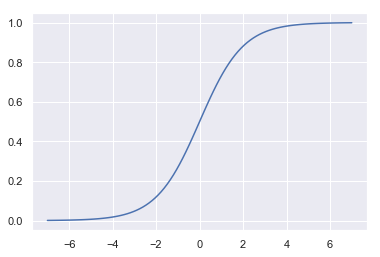

In [3]:
plt.plot(np.linspace(-7, 7, 100), [1 / (1 + np.exp(-t)) for t in np.linspace(-7, 7, 100)]);

In [4]:
def f(x, t, **params):
    x0, x1 = x
    return np.array([
        x0 * (1 - x0) - x0 * x1 * params['beta'],
        x1 * (1 - x1) - x0 * x1 * params['beta']
    ])


In [5]:
def emulate(f, x_start, time_limit, dt, parameters={}):
    x0 = [x_start[0]]
    x1 = [x_start[1]]
    x_cur = x_start.copy()
    
    for ts in range(time_limit):
        x_cur += f(x_cur, ts, **parameters) * dt
        x0.append(x_cur[0])
        x1.append(x_cur[1])
        
    return x0, x1

In [6]:
parameters = {'beta': 0.7, 'x0_label': 'Company A', 'x1_label': 'Company B'}

x_start = np.array([
    0.2, 0.4
])

In [7]:
x0, x1 = emulate(f, x_start, 3 * 10**3, 1e-2, parameters)

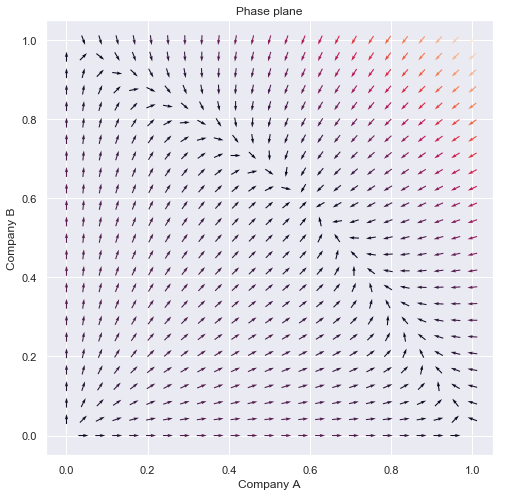

In [8]:
plot_phase_plane(f, lines=25, x0_bounds=(0,1), x1_bounds=(0,1), parameters=parameters)

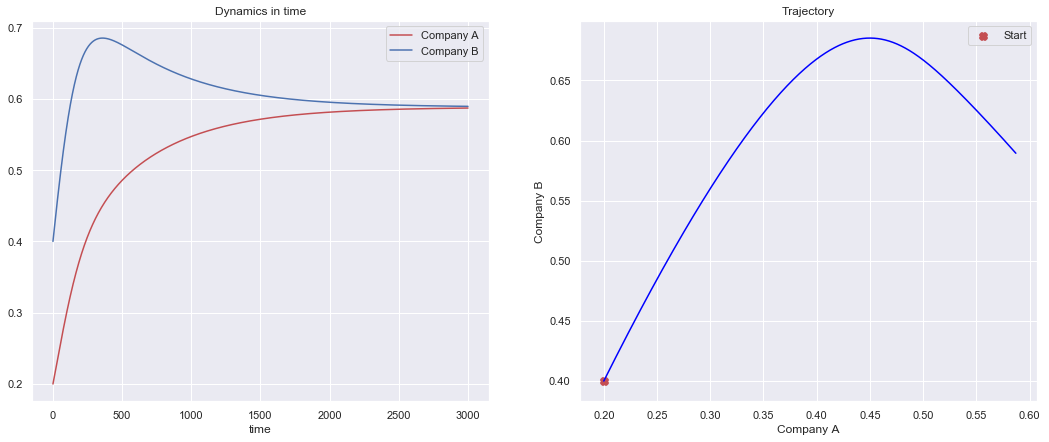

In [9]:
plot_dynamics(x0, x1, parameters)

### Модель Лотки — Вольтерры (Хищник - Жертва)

In [10]:
def f(x, t, **params):
    x0, x1 = x
    return np.array([
        params['a'] * x0 - params['b'] * x0 * x1,
        -params['c'] * x1 + params['d'] * x0 * x1
    ])


In [11]:
parameters = {'a': 0.5, 'b': 0.4, 'c': 0.2, 'd': 0.1, 'x0_label': 'Prey', 'x1_label': 'Predator'}

x_start = np.array([
    3., 0.5
])

In [12]:
x0, x1 = emulate(f, x_start, 10**3, 1e-1, parameters)

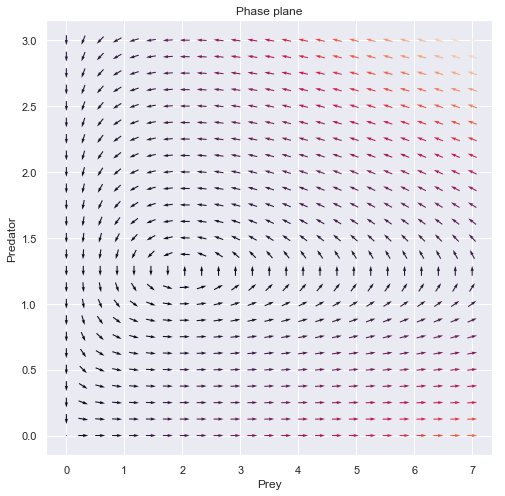

In [13]:
plot_phase_plane(f, lines=25, x0_bounds=(0,7), x1_bounds=(0,3), parameters=parameters)

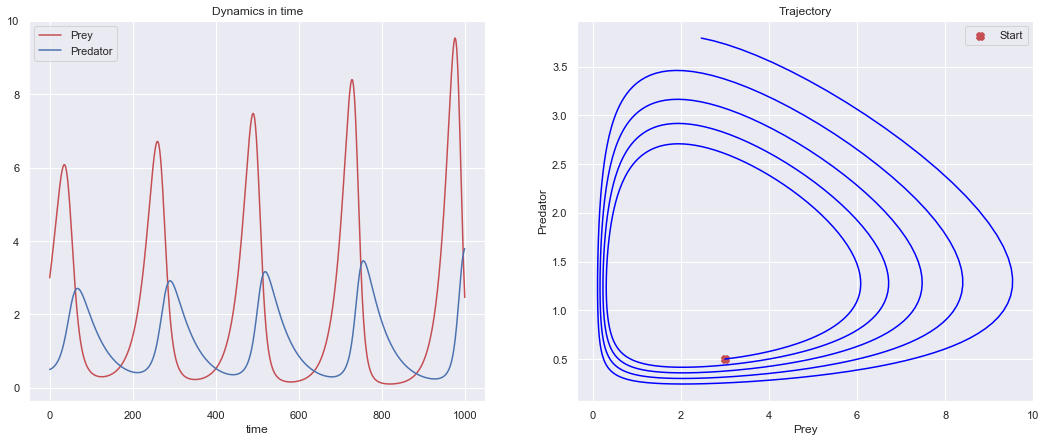

In [14]:
plot_dynamics(x0, x1, parameters)